In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [140]:
pd.set_option('display.max_colwidth', -1)
data = json.load(open('accuracies_k=3.json'))
df = pd.concat({k: pd.DataFrame(v,) for k, v in data.items()}, axis=0)

/Users/theo/anaconda3/envs/one_shot_scale_invariance/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [141]:
df

implementation_0  \
resnet101   0  [1.0, 1.0, 1.0]                                                
            1  [0.5864661654135338, 0.6015037593984962, 0.6127819548872181]   
            2  [0.5338345864661654, 0.5526315789473685, 0.5300751879699248]   
            3  [0.5375939849624061, 0.5375939849624061, 0.5789473684210527]   
            4  [0.518796992481203, 0.5263157894736842, 0.5375939849624061]    
vgg19       0  [1.0, 1.0, 1.0]                                                
            1  [0.556390977443609, 0.5639097744360902, 0.5338345864661654]    
            2  [0.556390977443609, 0.5676691729323309, 0.5714285714285714]    
            3  [0.5300751879699248, 0.5225563909774437, 0.5451127819548872]   
            4  [0.5225563909774437, 0.5488721804511278, 0.5225563909774437]   
densenet169 0  [1.0, 1.0, 1.0]                                                
            1  [0.5601503759398496, 0.5526315789473685, 0.5150375939849624]   
            2  [0.5526315789473685, 0.5263157894736842, 0.518796992481203]    
            3  [0.5300751879699248, 0.5, 0.5225563909774437]                  
            4  [0.5488721804511278, 0.5037593984962406, 0.5902255639097744]   
cornet2     0  [1.0, 1.0, 1.0]                                                
            1  [0.518796992481203, 0.5639097744360902, 0.5639097744360902]    
            2  [0.5676691729323309, 0.5413533834586466, 0.5676691729323309]   
            3  [0.5864661654135338, 0.5639097744360902, 0.5075187969924813]   
            4  [0.5225563909774437, 0.5300751879699248, 0.5601503759398496]   

                                                            implementation_1  \
resnet101   0  [0.9924812030075187, 0.9962406015037594, 0.9962406015037594]    
            1  [0.5639097744360902, 0.6879699248120301, 0.650375939849624]     
            2  [0.6090225563909775, 0.6165413533834586, 0.6466165413533834]    
            3  [0.6240601503759399, 0.5488721804511278, 0.6390977443609023]    
            4  [0.5902255639097744, 0.5488721804511278, 0.5789473684210527]    
vgg19       0  [0.9887218045112782, 0.9548872180451128, 0.9887218045112782]    
            1  [0.5676691729323309, 0.5375939849624061, 0.5037593984962406]    
            2  [0.4849624060150376, 0.5112781954887218, 0.518796992481203]     
            3  [0.5075187969924813, 0.48120300751879697, 0.5225563909774437]   
            4  [0.4849624060150376, 0.5526315789473685, 0.5075187969924813]    
densenet169 0  [0.9962406015037594, 0.9962406015037594, 1.0]                   
            1  [0.5902255639097744, 0.631578947368421, 0.5977443609022557]     
            2  [0.5977443609022557, 0.5526315789473685, 0.5639097744360902]    
            3  [0.6015037593984962, 0.6203007518796992, 0.6278195488721805]    
            4  [0.5300751879699248, 0.6052631578947368, 0.5639097744360902]    
cornet2     0  [0.9962406015037594, 0.9962406015037594, 0.9962406015037594]    
            1  [0.6654135338345865, 0.6729323308270677, 0.6729323308270677]    
            2  [0.6127819548872181, 0.6691729323308271, 0.5939849624060151]    
            3  [0.5939849624060151, 0.6390977443609023, 0.6052631578947368]    
            4  [0.5451127819548872, 0.6203007518796992, 0.5827067669172933]    

               implementation_2  
resnet101   0 NaN                
            1 NaN                
            2 NaN                
            3 NaN                
            4 NaN                
vgg19       0 NaN                
            1 NaN                
            2 NaN                
            3 NaN                
            4 NaN                
densenet169 0 NaN                
            1 NaN                
            2 NaN                
            3 NaN                
            4 NaN                
cornet2     0 NaN                
            1 NaN                
            2 NaN                
            3 NaN                
            4 NaN

### Implementation 0 Plots

In [142]:
imp_0_df = pd.DataFrame(index=df.index)

In [143]:
imp_0_df['mean_acc'] = df['implementation_0'].apply(lambda x: np.mean(x))
imp_0_df['std_acc'] = df['implementation_0'].apply(lambda x: np.std(x))

In [144]:
imp_0_df.index

MultiIndex([(  'resnet101', '0'),
            (  'resnet101', '1'),
            (  'resnet101', '2'),
            (  'resnet101', '3'),
            (  'resnet101', '4'),
            (      'vgg19', '0'),
            (      'vgg19', '1'),
            (      'vgg19', '2'),
            (      'vgg19', '3'),
            (      'vgg19', '4'),
            ('densenet169', '0'),
            ('densenet169', '1'),
            ('densenet169', '2'),
            ('densenet169', '3'),
            ('densenet169', '4'),
            (    'cornet2', '0'),
            (    'cornet2', '1'),
            (    'cornet2', '2'),
            (    'cornet2', '3'),
            (    'cornet2', '4')],
           )

In [145]:
imp_0_df.reset_index().set_index(['level_1', 'level_0'])

,,mean_acc,std_acc
level_1,level_0,,
0,resnet101,1.000000,0.000000
1,resnet101,0.600251,0.010780
2,resnet101,0.538847,0.009867
3,resnet101,0.551378,0.019494
4,resnet101,0.527569,0.007725
0,vgg19,1.000000,0.000000
1,vgg19,0.551378,0.012779
2,vgg19,0.565163,0.006390
3,vgg19,0.532581,0.009378


<AxesSubplot:xlabel='level_1'>

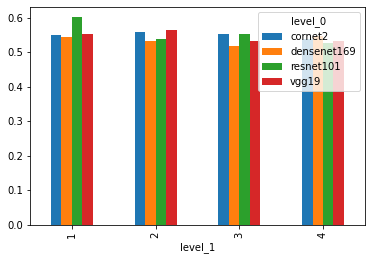

In [146]:
imp_0_df.reset_index().set_index(['level_1', 'level_0']).loc[pd.IndexSlice[['1', '2', '3', '4'],:,:]]['mean_acc'].unstack().plot(kind='bar', stacked=False)

In [147]:
imp_0_df['std_acc']

resnet101    0    0.000000
             1    0.010780
             2    0.009867
             3    0.019494
             4    0.007725
vgg19        0    0.000000
             1    0.012779
             2    0.006390
             3    0.009378
             4    0.012405
densenet169  0    0.000000
             1    0.019734
             2    0.014506
             3    0.012779
             4    0.035311
cornet2      0    0.000000
             1    0.021266
             2    0.012405
             3    0.033202
             4    0.016242
Name: std_acc, dtype: float64

<AxesSubplot:>

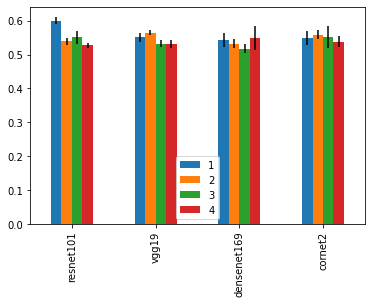

In [148]:
imp_0_df['mean_acc'].loc[pd.IndexSlice[:, ['1', '2', '3', '4'],:]].unstack().plot(kind='bar', yerr=imp_0_df['std_acc'].loc[pd.IndexSlice[:,['1', '2', '3', '4'],:]].unstack(), stacked=False)


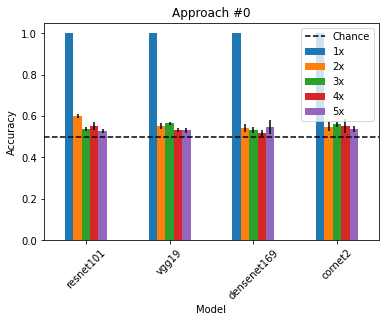

In [149]:
imp_0_df['mean_acc'].unstack().plot(kind='bar', yerr=imp_0_df['std_acc'].unstack(), stacked=False)
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.title('Approach #0')
plt.axhline(y=0.5, color='black', linestyle='--')
plt.legend(['Chance', '1x', '2x', '3x', '4x', '5x'])

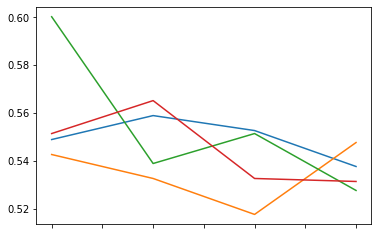

In [25]:
imp_0_df.loc[pd.IndexSlice['cornet2', ['1', '2', '3', '4'], :]]['mean_acc'].plot()
imp_0_df.loc[pd.IndexSlice['densenet169', ['1', '2', '3', '4'], :]]['mean_acc'].plot()
imp_0_df.loc[pd.IndexSlice['resnet101', ['1', '2', '3', '4'], :]]['mean_acc'].plot()
imp_0_df.loc[pd.IndexSlice['vgg19', ['1', '2', '3', '4'], :]]['mean_acc'].plot()

### Implementation 1 Plots

In [77]:
imp_1_df = pd.DataFrame(index=df.index)

In [78]:
imp_1_df['mean_acc'] = df['implementation_1'].apply(lambda x: np.mean(x))
imp_1_df['std_acc'] = df['implementation_1'].apply(lambda x: np.std(x))

In [85]:
imp_1_df.index

MultiIndex(levels=[['cornet2', 'densenet169', 'resnet101', 'vgg19'], ['0', '1', '2', '3', '4']],
           labels=[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3], [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]])

In [86]:
imp_1_df.reset_index().set_index(['level_1', 'level_0'])

,,mean_acc,std_acc
level_1,level_0,,
0,cornet2,0.996241,0.000000
1,cornet2,0.670426,0.003544
2,cornet2,0.625313,0.031949
3,cornet2,0.612782,0.019169
4,cornet2,0.582707,0.030695
0,densenet169,0.997494,0.001772
1,densenet169,0.606516,0.017986
2,densenet169,0.571429,0.019169
3,densenet169,0.616541,0.011067


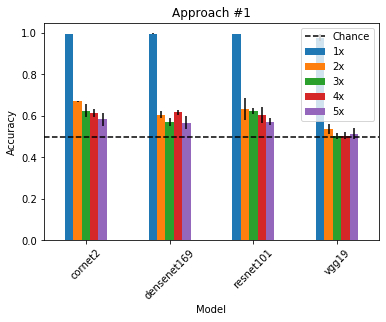

In [94]:
imp_1_df['mean_acc'].unstack().plot(kind='bar', yerr=imp_1_df['std_acc'].unstack(), stacked=False)
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.title('Approach #1')
plt.axhline(y=0.5, color='black', linestyle='--')
plt.legend(['Chance', '1x', '2x', '3x', '4x', '5x'])

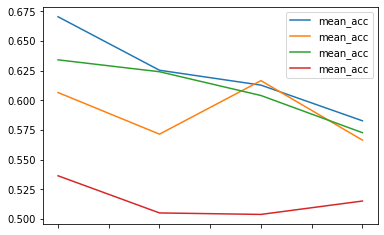

In [91]:
imp_1_df.loc[pd.IndexSlice['cornet2', ['1', '2', '3', '4'], :]]['mean_acc'].plot()
imp_1_df.loc[pd.IndexSlice['densenet169', ['1', '2', '3', '4'], :]]['mean_acc'].plot()
imp_1_df.loc[pd.IndexSlice['resnet101', ['1', '2', '3', '4'], :]]['mean_acc'].plot()
imp_1_df.loc[pd.IndexSlice['vgg19', ['1', '2', '3', '4'], :]]['mean_acc'].plot()
plt.legend()

### Implementation 2 Plots

In [163]:
imp2_data = {'cornet2':{'0': [1.0, 1.0], '1': [0.785, 0.805], '2': [0.765, 0.7825], '3': [0.775, 0.81], '4': [0.715, 0.73]},
    'vgg19':{'0': [1.0, 1.0], '1': [0.6075, 0.585], '2': [0.5875, 0.59], '3': [0.565, 0.6225], '4': [0.5875, 0.59]},
    'densenet169': {'0': [1.0, 1.0], '1': [0.53, 0.535], '2': [0.5475, 0.55], '3': [0.55, 0.5175], '4': [0.5175, 0.52]},
    'resnet101': {'0': [1.0, 0.985], '1': [0.5725, 0.535], '2': [0.5825, 0.5425], '3': [0.5325, 0.5525], '4': [0.5175, 0.5125]}
            }

In [164]:
df = pd.concat({k: pd.DataFrame(v,) for k, v in imp2_data.items()}, axis=0)

In [165]:
df = df.unstack(level=1).stack(level=0)

In [166]:
df["mean_acc"] = df.mean(axis=1)
df["std_acc"] = df.std(axis=1)
df.drop(columns=[0,1], inplace=True)
imp_2_df = df

In [209]:
imp_2_df['std_acc'].unstack()

,0,1,2,3,4
cornet2,0.0000,0.01000,0.00875,0.01750,0.00750
densenet169,0.0000,0.00250,0.00125,0.01625,0.00125
resnet101,0.0075,0.01875,0.02000,0.01000,0.00250
vgg19,0.0000,0.01125,0.00125,0.02875,0.00125


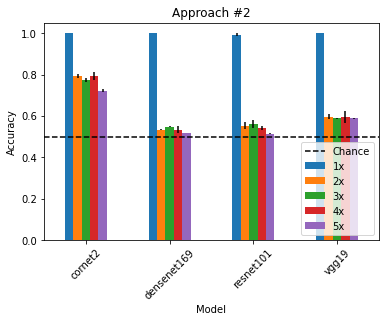

In [227]:
imp_2_df['mean_acc'].unstack().plot(kind='bar', yerr=imp_2_df['std_acc'].unstack(), stacked=False)
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.title('Approach #2')
plt.axhline(y=0.5, color='black', linestyle='--')
plt.legend(['Chance', '1x', '2x', '3x', '4x', '5x'], loc="lower right")

### Average Across Implementations

In [188]:
all_imps = pd.concat([imp_0_df, imp_1_df, imp_2_df], axis=1)

In [189]:
all_imps.columns = ['mean_acc_0', 'std_acc_0', 'mean_acc_1', 'std_acc_1', 'mean_acc_2', 'std_acc_2']

In [193]:
all_imps['mean_acc'] = all_imps[['mean_acc_0','mean_acc_1','mean_acc_2']].mean(axis=1)
all_imps['std_acc'] = all_imps[['std_acc_0','std_acc_1','std_acc_2']].mean(axis=1)

all_imps.drop(columns=['mean_acc_0', 'std_acc_0', 'mean_acc_1', 'std_acc_1', 'mean_acc_2', 'std_acc_2'], inplace=True)

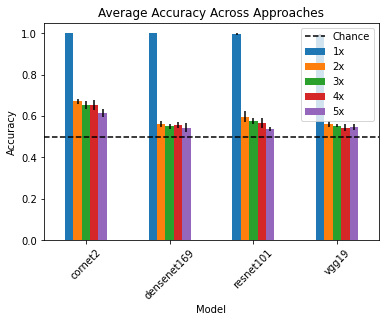

In [196]:
all_imps['mean_acc'].unstack().plot(kind='bar', yerr=all_imps['std_acc'].unstack(), stacked=False)
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.title('Average Accuracy Across Approaches')
plt.axhline(y=0.5, color='black', linestyle='--')
plt.legend(['Chance', '1x', '2x', '3x', '4x', '5x'])

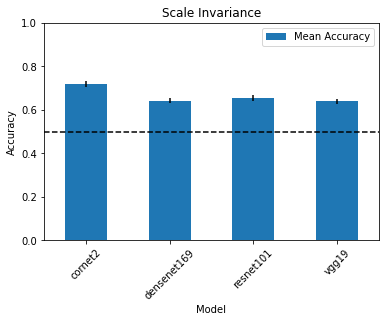

In [222]:
agg_df = all_imps.groupby(level=0).mean()
agg_df['Mean Accuracy'] = agg_df['mean_acc']
agg_df.loc[:, ["Mean Accuracy"]].plot.bar(yerr=agg_df['std_acc'])
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.title('Scale Invariance')
plt.ylim(0,1)
plt.axhline(y=0.5, color='black', linestyle='--')

In [223]:
agg_df

,mean_acc,std_acc,Mean Accuracy
cornet2,0.717948,0.014148,0.717948
densenet169,0.642166,0.012288,0.642166
resnet101,0.654275,0.015566,0.654275
vgg19,0.639036,0.012349,0.639036
